In [1]:
# standard ds imports
import numpy as np
import pandas as pd

# for visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# for statistical analysis
import scipy.stats as stats

# for wrangling
import wrangle

# for scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

# for modeling
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = wrangle.wrangle_zillow()

In [3]:
train, val, test = wrangle.split_data(df)

In [4]:
train, val, test = wrangle.impute_mode(train, val, test, 'built')

In [5]:
train.head()

,beds,baths,sqft,tax_value,built,taxes,location
1904381,2.0,2.0,1323.0,552000.0,1986.0,5667.34,6059.0
1514967,3.0,1.0,1017.0,207721.0,1944.0,3238.93,6037.0
693486,3.0,1.0,1198.0,509712.0,1938.0,5621.58,6037.0
1737733,3.0,2.0,1468.0,712903.0,1938.0,8962.32,6037.0
1387767,3.0,2.5,1830.0,719668.0,1994.0,8330.70,6059.0


In [13]:
X_train = train.drop(columns='tax_value')
y_train = train[['tax_value']]
X_val = val.drop(columns='tax_value')
y_val = val[['tax_value']]
X_test = test.drop(columns='tax_value')
y_test = test[['tax_value']]

#### 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

In [9]:
scaler = MinMaxScaler()
train[['beds_mm', 'baths_mm', 'sqft_mm', 'taxes_mm']] = scaler.fit_transform(X_train[['beds','baths','sqft','taxes']])

In [11]:
scaler = StandardScaler()
train[['beds_st', 'baths_st', 'sqft_st', 'taxes_st']] = scaler.fit_transform(X_train[['beds','baths','sqft','taxes']])

In [12]:
scaler = RobustScaler()
train[['beds_rb', 'baths_rb', 'sqft_rb', 'taxes_rb']] = scaler.fit_transform(X_train[['beds','baths','sqft','taxes']])

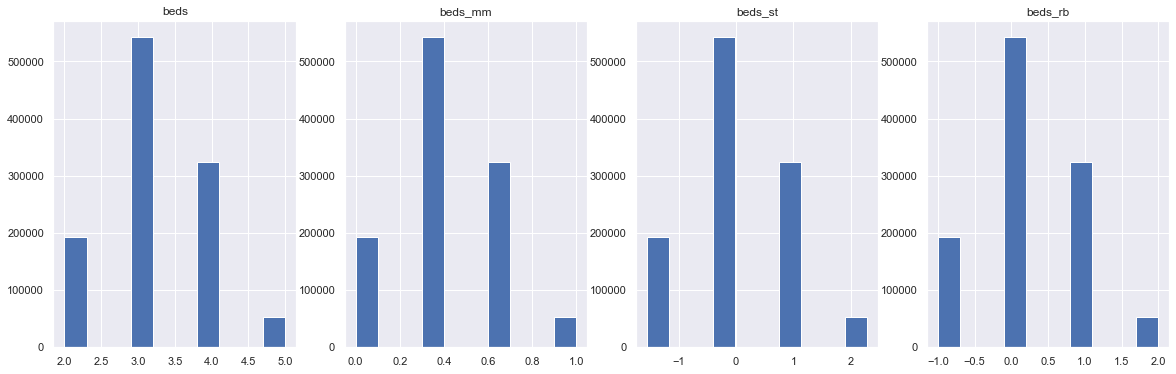

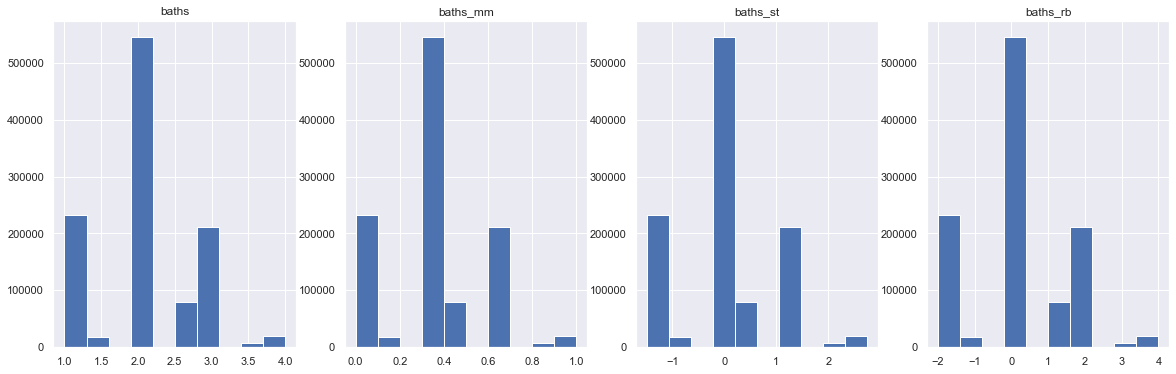

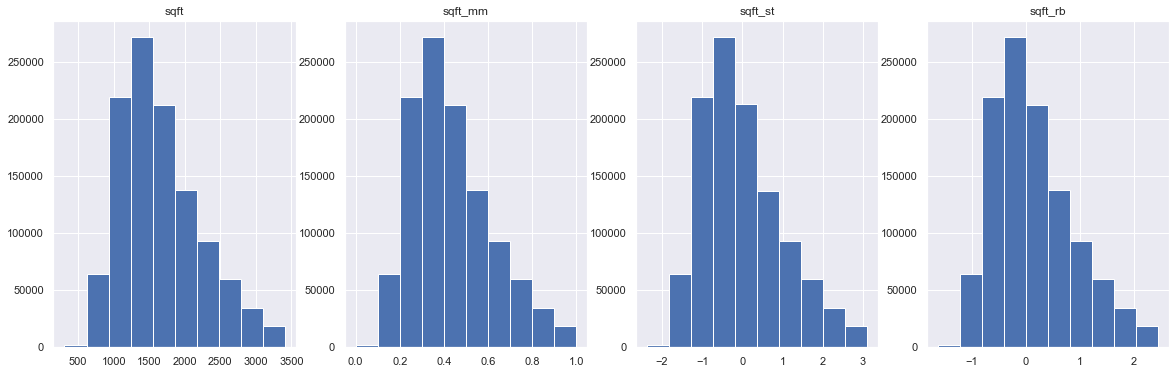

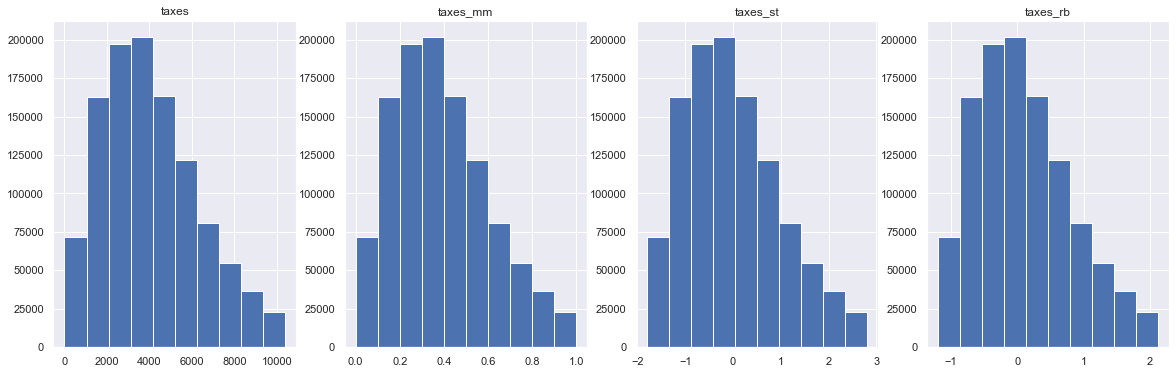

In [13]:
cols = ['beds', 'baths', 'sqft', 'taxes']

for col in cols:
    plt.figure(figsize=(20,6))
    col_mm = col + '_mm'
    col_st = col + '_st'
    col_rb = col + '_rb'
    
    plt.subplot(1, 4, 1)
    plt.title(col)
    plt.hist(train[col])
    
    plt.subplot(1,4,2)
    plt.title(col_mm)
    plt.hist(train[col_mm])
    
    plt.subplot(1,4,3)
    plt.title(col_st)
    plt.hist(train[col_st])
    
    plt.subplot(1,4,4)
    plt.title(col_rb)
    plt.hist(train[col_rb])
    plt.show()

#### 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [15]:
train[['beds_rb_inv', 'baths_rb_inv', 'sqft_rb_inv', 'taxes_rb_inv']] = scaler.inverse_transform(X_train[['beds','baths','sqft','taxes']])

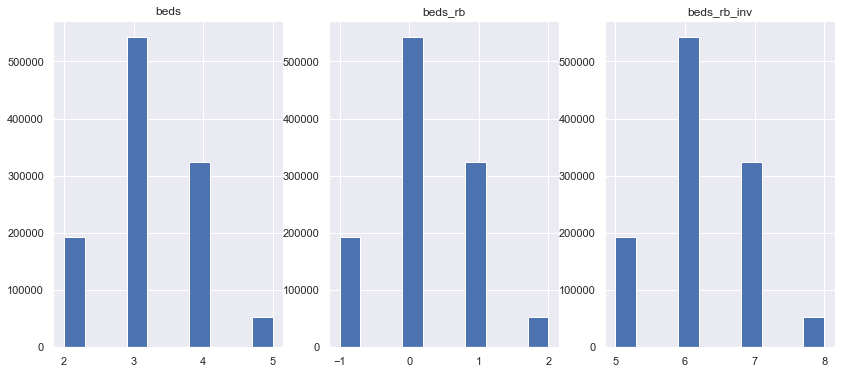

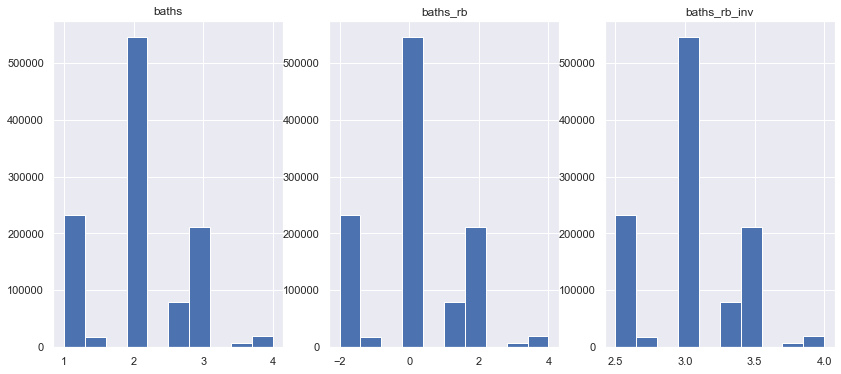

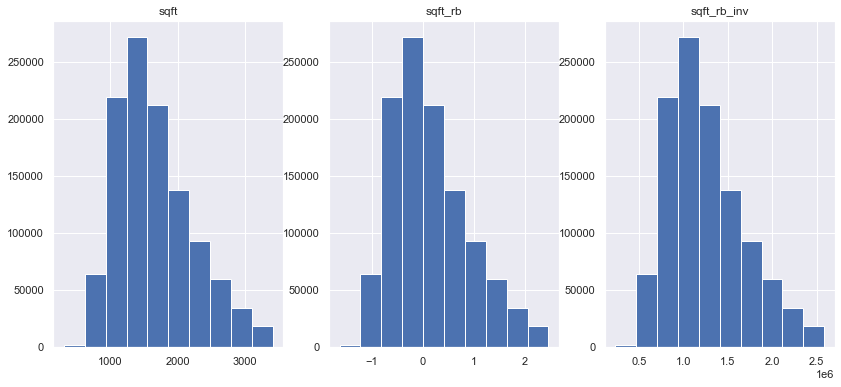

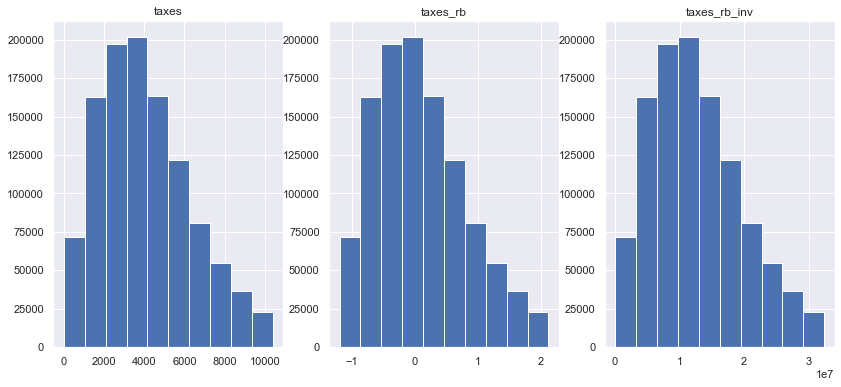

In [16]:
cols = ['beds', 'baths', 'sqft', 'taxes']

for col in cols:
    plt.figure(figsize=(14,6))
    col_rb = col + '_rb'
    col_rb_inv = col + '_rb_inv'
    
    plt.subplot(1, 3, 1)
    plt.title(col)
    plt.hist(train[col])
    
    plt.subplot(1,3,2)
    plt.title(col_rb)
    plt.hist(train[col_rb])
    
    plt.subplot(1,3,3)
    plt.title(col_rb_inv)
    plt.hist(train[col_rb_inv])
    plt.show()

#### 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [17]:
from sklearn.preprocessing import QuantileTransformer

In [18]:
scaler = QuantileTransformer(output_distribution='normal')
train[['beds_qt', 'baths_qt', 'sqft_qt', 'taxes_qt']] = scaler.fit_transform(X_train[['beds','baths','sqft','taxes']])

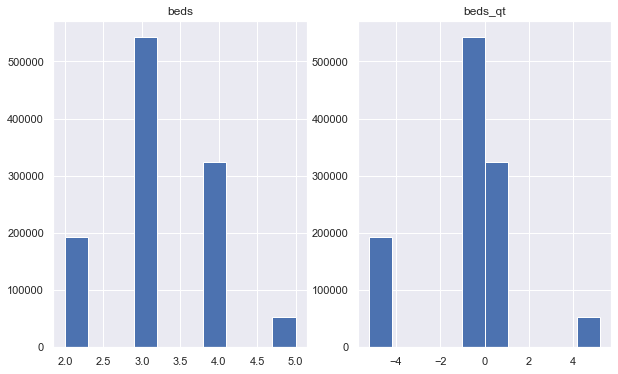

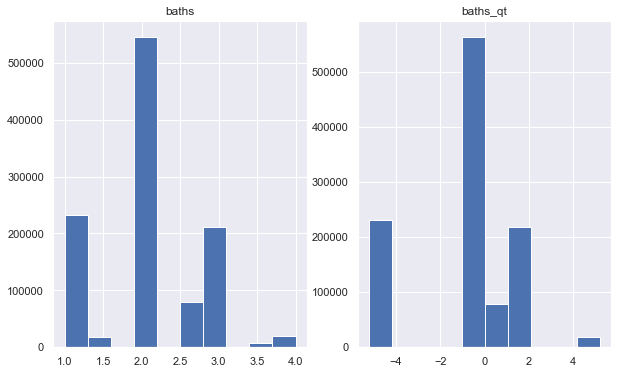

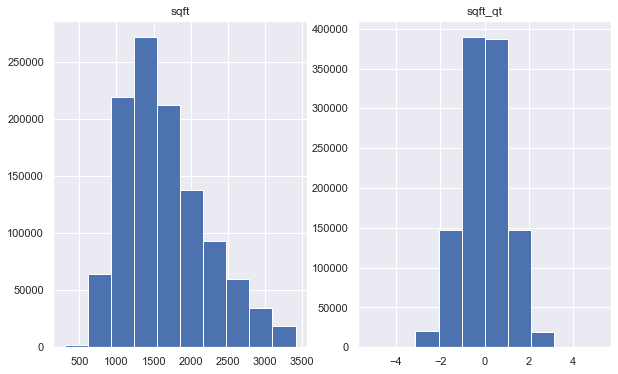

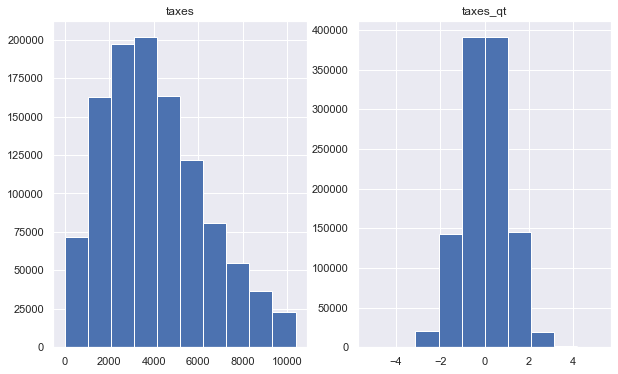

In [19]:
cols = ['beds', 'baths', 'sqft', 'taxes']

for col in cols:
    plt.figure(figsize=(10,6))
    col_qt = col + '_qt'
    
    plt.subplot(1, 2, 1)
    plt.title(col)
    plt.hist(train[col])
    
    plt.subplot(1,2,2)
    plt.title(col_qt)
    plt.hist(train[col_qt])

#### 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

In [20]:
scaler = QuantileTransformer()
train[['beds_qt', 'baths_qt', 'sqft_qt', 'taxes_qt']] = scaler.fit_transform(X_train[['beds','baths','sqft','taxes']])

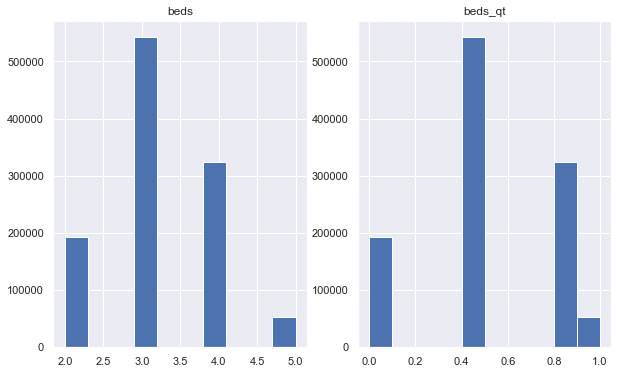

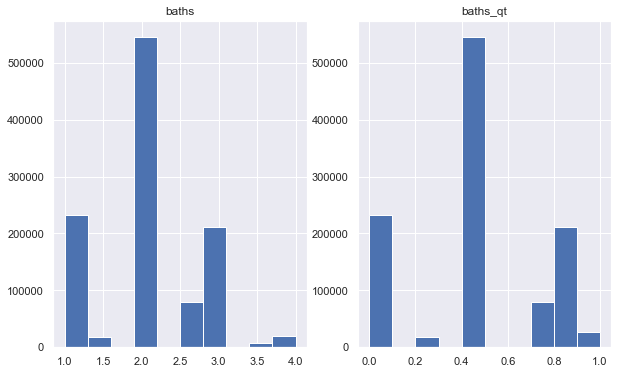

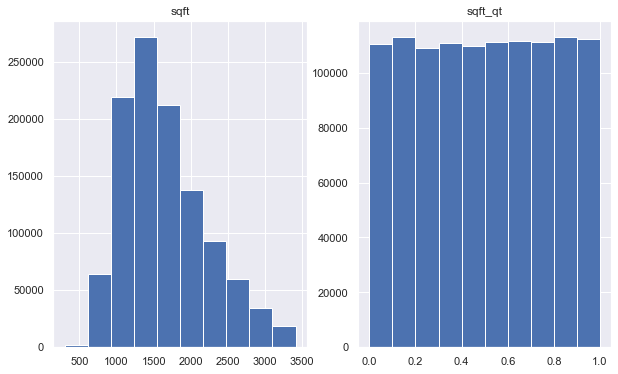

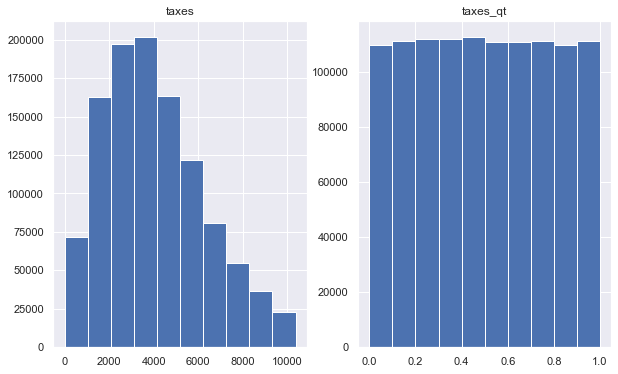

In [21]:
cols = ['beds', 'baths', 'sqft', 'taxes']

for col in cols:
    plt.figure(figsize=(10,6))
    col_qt = col + '_qt'
    
    plt.subplot(1, 2, 1)
    plt.title(col)
    plt.hist(train[col])
    
    plt.subplot(1,2,2)
    plt.title(col_qt)
    plt.hist(train[col_qt])

#### 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [7]:
# def scale_data(train, val, test, X_train, X_val, X_test):
#     '''
#     This function takes in train, val, test, and all three X_train sets
#     and returns the MinMaxScalar values added on train, val, test dataframes 
#     for beds, baths, sqft, and taxes features.
#     '''
#     scaler = MinMaxScaler()
#     train[['beds_mm', 'baths_mm', 'sqft_mm', 'taxes_mm']] = scaler.fit_transform(X_train[['beds','baths','sqft','taxes']])
#     val[['beds_mm', 'baths_mm', 'sqft_mm', 'taxes_mm']] = scaler.transform(X_val[['beds','baths','sqft','taxes']])
#     test[['beds_mm', 'baths_mm', 'sqft_mm', 'taxes_mm']] = scaler.transform(X_test[['beds','baths','sqft','taxes']])
    
#     return train, val, test


In [14]:
X_train_scaled, X_val_scaled, X_test_scaled = wrangle.scale_data(X_train, X_val, X_test)

In [10]:
X_train.head()

,beds,baths,sqft,built,taxes,location
1904381,2.0,2.0,1323.0,1986.0,5667.34,6059.0
1514967,3.0,1.0,1017.0,1944.0,3238.93,6037.0
693486,3.0,1.0,1198.0,1938.0,5621.58,6037.0
1737733,3.0,2.0,1468.0,1938.0,8962.32,6037.0
1387767,3.0,2.5,1830.0,1994.0,8330.70,6059.0


In [11]:
X_train_scaled.head()

,beds,baths,sqft,built,taxes,location
0,0.000000,0.333333,0.327208,0.860465,0.545280,0.297297
1,0.333333,0.000000,0.228562,0.665116,0.310857,0.000000
2,0.333333,0.000000,0.286912,0.637209,0.540863,0.000000
3,0.333333,0.333333,0.373952,0.637209,0.863355,0.000000
4,0.333333,0.500000,0.490651,0.897674,0.802383,0.297297


In [12]:
X_train.isnull().sum()

beds        0
baths       0
sqft        0
built       0
taxes       0
location    0
dtype: int64

In [13]:
X_train_scaled.isnull().sum()

beds        0
baths       0
sqft        0
built       0
taxes       0
location    0
dtype: int64

In [12]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1113143 entries, 1904381 to 1470909
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   beds      1113143 non-null  float64
 1   baths     1113143 non-null  float64
 2   sqft      1113143 non-null  float64
 3   built     1113143 non-null  float64
 4   taxes     1113143 non-null  float64
 5   location  1113143 non-null  float64
dtypes: float64(6)
memory usage: 59.4 MB


In [13]:
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113143 entries, 0 to 1113142
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   beds      1113143 non-null  float64
 1   baths     1113143 non-null  float64
 2   sqft      1113143 non-null  float64
 3   built     1113143 non-null  float64
 4   taxes     1113143 non-null  float64
 5   location  1113143 non-null  float64
dtypes: float64(6)
memory usage: 51.0 MB
